In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [4]:
df=pd.read_csv("wine_data.csv" ,header = None, usecols=[0,1,2])
df.columns = ["ClassLabel" , "Alcohol" , "Malic acid"]
df.groupby("ClassLabel")["Alcohol"].count()
df


,ClassLabel,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

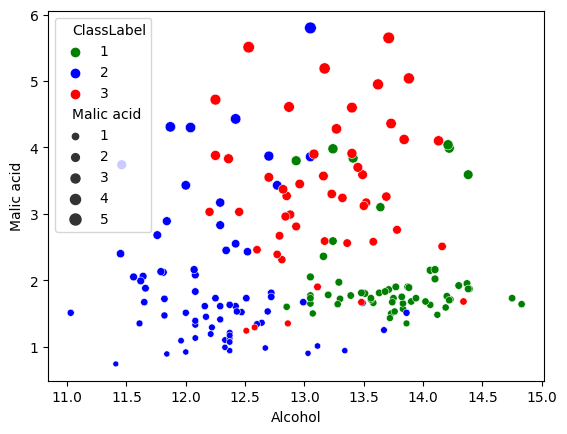

In [22]:
colors = {1:"Green" , 2:"Blue" , 3:"Red"}
sns.scatterplot(x=df["Alcohol"] , y=df["Malic acid"] ,hue=df["ClassLabel"] , palette=colors , size = df["Malic acid"])

** CREATING TEST AND TRAIN SETS **

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop("ClassLabel" , axis= 1) , df["ClassLabel"] , test_size=0.3 , random_state= 0)



In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
scaler.data_min_
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [30]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_train_scaled , columns=x_test.columns)


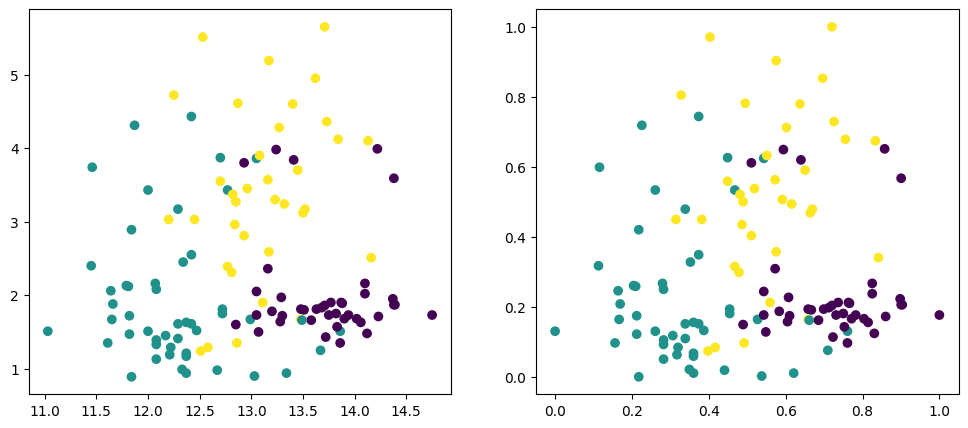

In [48]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))
ax1.scatter(x_train["Alcohol"] , x_train["Malic acid"] ,c = y_train)
# ax1.set_title("Befor scaling")
ax2.scatter(x_train_scaled["Alcohol"] , x_train_scaled["Malic acid"] ,c =y_train )
# ax2.set_title("After scaling")
plt.show()




<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

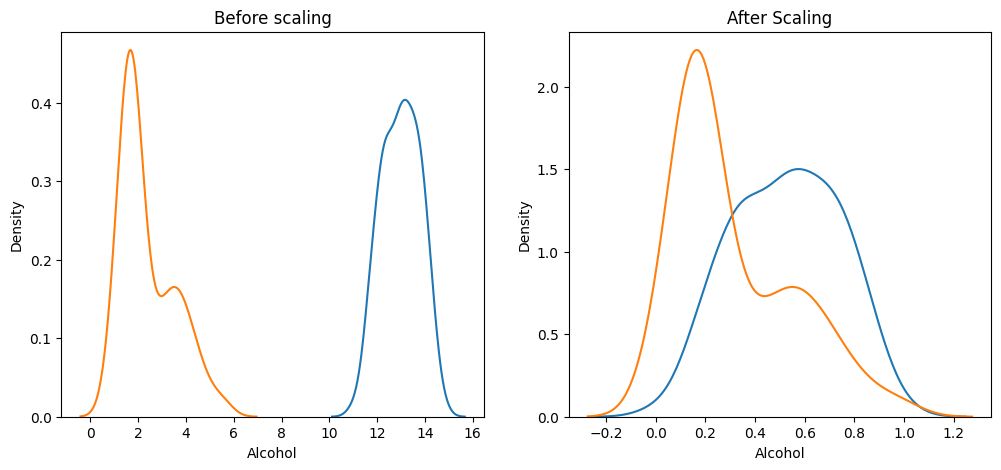

In [52]:
fig ,  (ax1,ax2) = plt.subplots(ncols = 2 , figsize = (12,5))

#  Before Scaling
ax1.set_title("Before scaling")
sns.kdeplot(x_train["Alcohol"] ,ax =ax1)
sns.kdeplot(x_train["Malic acid"],ax =ax1)


# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Alcohol"] , ax = ax2)
sns.kdeplot(x_train_scaled["Malic acid"] , ax = ax2)
